<h1>Seleção de Atributos

<h3>Ajustando a largura do meu jupyter notebook

In [1]:
from IPython.core.display import display, HTML 
display(HTML("<style>.container {width:90% !important;}</style>"))

<h3>Importando as bibliotecas

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC #O SVM assim como o NaiveBayes não aceita dados categóricos
import graphviz
from sklearn.tree import export_graphviz
from sklearn.ensemble import ExtraTreesClassifier

<h3>Carregando o dataset

In [5]:
credito = pd.read_csv(r'C:\Users\hik_m\Documents\Jornada do Conhecimento\Udemy\Formação Cientista de Dados\Machine Learning\Dados\Credit.csv')

<h2>Importante: Realizando os passos utilizando todas as variáveis

<h3>Segregando as variáveis entre previsoras e classe

In [6]:
previsoras = credito.iloc[:, 0:20].values
classe = credito.iloc[:, 20].values

<h3>Realizando as transformações

In [7]:
labelencoder = LabelEncoder()

In [8]:
previsoras[:, 0] = labelencoder.fit_transform(previsoras[:, 0])
previsoras[:, 2] = labelencoder.fit_transform(previsoras[:, 2])
previsoras[:, 3] = labelencoder.fit_transform(previsoras[:, 3])
previsoras[:, 5] = labelencoder.fit_transform(previsoras[:, 5])
previsoras[:, 6] = labelencoder.fit_transform(previsoras[:, 6])
previsoras[:, 8] = labelencoder.fit_transform(previsoras[:, 8])
previsoras[:, 9] = labelencoder.fit_transform(previsoras[:, 9])
previsoras[:, 11] = labelencoder.fit_transform(previsoras[:, 11])
previsoras[:, 13] = labelencoder.fit_transform(previsoras[:, 13])
previsoras[:, 14] = labelencoder.fit_transform(previsoras[:, 14])
previsoras[:, 16] = labelencoder.fit_transform(previsoras[:, 16])
previsoras[:, 18] = labelencoder.fit_transform(previsoras[:, 18])
previsoras[:, 19] = labelencoder.fit_transform(previsoras[:, 19])

<h3>Separando dados de treino e teste

In [9]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsoras, classe, test_size=0.3, random_state=0)

<h3>Criado o objeto arvore de decisão

In [11]:
svm = SVC()

In [12]:
#Neste momento existe o aprendizado
svm.fit(X_treinamento, y_treinamento)

SVC()

<h3>Inicio as minhas previsões

In [13]:
previsoes = svm.predict(X_teste)
previsoes

array(['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'bad', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'g

<h3>Agora já tenho minhas previsões. Preciso comparar as previsões com dataset y_teste onde são encontradas as repostas corretas. Assim, consigo verificar a acurácia das minhas previsões.

In [14]:
#Matrix de confusão
confusao = confusion_matrix(y_teste, previsoes)
confusao

array([[  5,  81],
       [  4, 210]], dtype=int64)

<h4>Visualizar a matrix de confusão utilizando o pacote yellowbrick

c:\users\hik_m\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
c:\users\hik_m\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


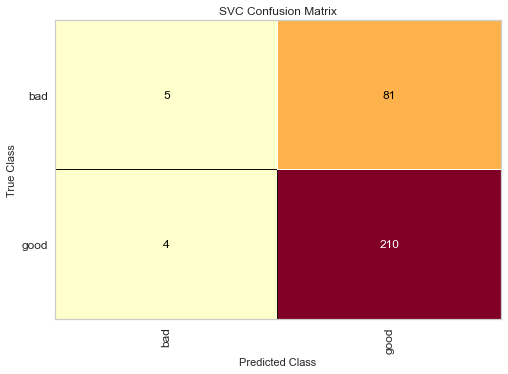

In [15]:
from yellowbrick.classifier import ConfusionMatrix

#Crio o objeto v de visualização
v = ConfusionMatrix(SVC())
v.fit(X_treinamento, y_treinamento)
v.score(X_teste, y_teste)
v.poof()

<h3>Verificando as taxas de acerto e erro encontradas

In [16]:
taxadeacerto = accuracy_score(y_teste, previsoes)
taxadeacerto #Taxa de acerto equivalente a taxa encontrada no algoritmo NaivaBayes

0.7166666666666667

In [17]:
taxadeerro = 1 - taxadeacerto
taxadeerro

0.2833333333333333

In [18]:
#É possível verificar que tive uma taxa de acerto menor quando comparado com a taxa de acerto encontrado pelo algortimo GaussianNB (NaiveBayes)

<h2>Inicio da seleção de atributos

In [19]:
from sklearn.ensemble import ExtraTreesClassifier

In [20]:
forest = ExtraTreesClassifier()
forest.fit(X_treinamento, y_treinamento)

ExtraTreesClassifier()

In [52]:
importancias = forest.feature_importances_
importancias

array([0.09993579, 0.08840861, 0.05926815, 0.05870719, 0.0839594 ,
       0.04470066, 0.05767493, 0.04982773, 0.04973928, 0.02955558,
       0.04855007, 0.0477311 , 0.06111872, 0.0367707 , 0.04211671,
       0.03485721, 0.0410519 , 0.02947092, 0.02860755, 0.00794779])

In [21]:
X_treinamento2 = X_treinamento[:, [0,1,2,3]]
X_teste2 = X_teste[:, [0,1,2,3]]

In [22]:
svm2 = SVC()
svm2.fit(X_treinamento2, y_treinamento)
previsoes2 = svm2.predict(X_teste2)

In [23]:
taxadeacerto2 = accuracy_score(y_teste, previsoes2)
taxadeacerto2 #Taxa de acerto equivalente a taxa encontrada no algoritmo NaivaBayes

0.7133333333333334

In [24]:
taxadeerro2 = 1 - taxadeacerto2
taxadeerro2

0.2866666666666666

In [25]:
#Fazendo a comparação entre as taxas de acerto utilizando todas as variáveis e utilizando as variáveis 0,1,2 e 3 foi possível observar uma melhoria
#na previsão do modelo svm2 no qual fez uso da técnica seleção de atributos